<a href="https://colab.research.google.com/github/Rajarshi12321/ByDeWay-Depth-Captioning/blob/main/notebooks/depth_kosmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Rajarshi12321/Depth-Captioning.git


Cloning into 'Depth-Captioning'...
remote: Enumerating objects: 167, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 167 (delta 8), reused 18 (delta 3), pack-reused 133 (from 2)
Receiving objects: 100% (167/167), 83.53 MiB | 7.28 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [2]:
import os

# Change directory to /content/Depth-Captioning
os.chdir('/content/Depth-Captioning')

# Verify current working directory
print("Current working directory:", os.getcwd())

Current working directory: /content/Depth-Captioning


In [ ]:
!pip install -r requirements.txt

!chmod +x install_depth_anything.sh
!./install_depth_anything.sh

INFO: pip is looking at multiple versions of google-generativeai to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of google-generativeai to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883

In [ ]:
from src.depth_captioning.depth_kosmos import requests, DepthKosmosCaptioner, Image as Image_PIL
import numpy as np

depth_kosmos_captioner = DepthKosmosCaptioner()

In [ ]:
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTp5jMLHnfiO56w8iVWAwI4VvOu4B_5c2C1ww&s"
image = Image_PIL.open(requests.get(url, stream=True).raw)

In [ ]:
image

In [ ]:
# depth_kosmos_captioner.display_depth_images(image)
full_caption_string = depth_kosmos_captioner.get_caption_with_depth(image)
print(full_caption_string)

In [ ]:
depth_kosmos_captioner.display_depth_images(image)

array([[[ 61, 148, 183],
        [ 61, 148, 183],
        [ 61, 148, 183],
        ...,
        [ 54, 130, 186],
        [ 54, 130, 186],
        [ 59, 123, 183]],

       [[ 61, 148, 183],
        [ 61, 148, 183],
        [ 61, 148, 183],
        ...,
        [ 54, 130, 186],
        [ 54, 130, 186],
        [ 54, 130, 186]],

       [[ 61, 148, 183],
        [ 61, 148, 183],
        [ 61, 148, 183],
        ...,
        [ 54, 130, 186],
        [ 54, 130, 186],
        [ 54, 130, 186]],

       ...,

       [[168,  12,  68],
        [166,  10,  68],
        [166,  10,  68],
        ...,
        [192,  39,  74],
        [192,  39,  74],
        [192,  39,  74]],

       [[164,   8,  67],
        [164,   8,  67],
        [162,   5,  67],
        ...,
        [188,  34,  73],
        [188,  34,  73],
        [188,  34,  73]],

       [[160,   3,  66],
        [160,   3,  66],
        [160,   3,  66],
        ...,
        [186,  32,  72],
        [186,  32,  72],
        [183,  29,  72]]], dtype=uint8)
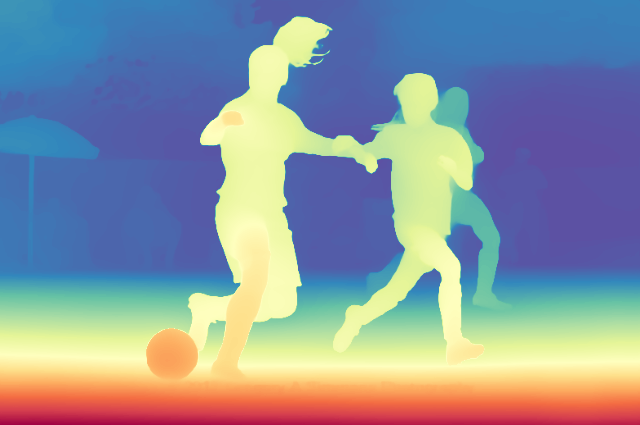

In [ ]:
all_outputs = depth_kosmos_captioner.depth_context.on_submit(np.array(image))

intensity_image = all_outputs[0][1]

intensity_image